# Diabetes Prediction

In [4]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Input
from livelossplot import PlotLossesKerasTF

In [5]:
df=pd.read_csv("diabetes.csv")

In [6]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [7]:
df.shape

(768, 9)

In [8]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

#### Separate feature and outcome

In [9]:
x=df.drop(columns="Outcome")
y=df.Outcome

#### Split the data

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [11]:
print(x_train.shape)
print(x_test.shape)

(614, 8)
(154, 8)


#### Standardise the data

In [12]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x_train_std=st.fit_transform(x_train)
x_test_std=st.fit_transform(x_test)

In [13]:
x_train_std

array([[ 0.90832902,  0.91569367,  0.44912368, ...,  0.37852648,
         0.67740401,  1.69955804],
       [ 0.03644676, -0.75182191, -0.47230103, ..., -0.50667229,
        -0.07049698, -0.96569189],
       [-1.12606292,  1.38763205,  1.06340683, ...,  2.54094063,
        -0.11855487, -0.88240283],
       ...,
       [ 0.03644676, -0.84620959, -0.21634972, ..., -0.94927168,
        -0.95656442, -1.04898095],
       [ 2.0708387 , -1.12937261,  0.24436264, ..., -0.26640405,
        -0.50001442,  0.11706589],
       [ 0.32707418,  0.47521786,  0.65388473, ..., -4.07275877,
         0.52121586,  2.94889395]])

#### Model Building

In [14]:
model=Sequential()

model.add(Input(shape=(8,),name="Input Layer"))

model.add(Dense(10,activation='relu',name="Hidden1"))

model.add(Dense(12,activation='relu',name="Hidden2"))

model.add(Dense(1,activation='sigmoid',name='OutputLayer'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


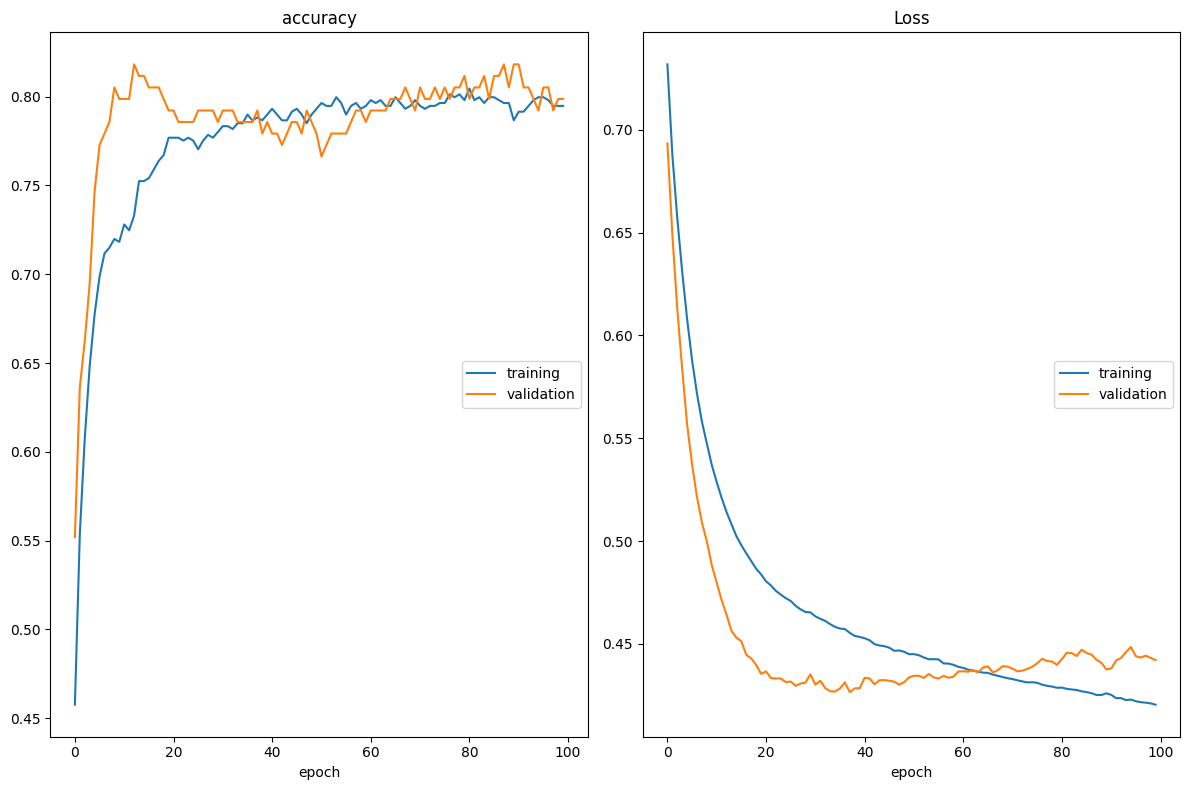

accuracy
	training         	 (min:    0.458, max:    0.805, cur:    0.795)
	validation       	 (min:    0.552, max:    0.818, cur:    0.799)
Loss
	training         	 (min:    0.420, max:    0.732, cur:    0.420)
	validation       	 (min:    0.427, max:    0.693, cur:    0.442)
20/20 [==============================] - 0s 14ms/step - loss: 0.4204 - accuracy: 0.7948 - val_loss: 0.4421 - val_accuracy: 0.7987


In [15]:
model.fit(x_train_std,y_train,epochs=100,batch_size=32, validation_data=(x_test_std,y_test),callbacks=[PlotLossesKerasTF()])

In [16]:
from sklearn.metrics import classification_report

In [17]:
t= model.predict(x_test_std)

5/5 [==============================] - 0s 1ms/step


In [18]:
t

array([[0.9740309 ],
       [0.07189223],
       [0.07804407],
       [0.6143924 ],
       [0.1722403 ],
       [0.01298082],
       [0.80165404],
       [0.834287  ],
       [0.4131935 ],
       [0.4000769 ],
       [0.72396433],
       [0.86650467],
       [0.13753735],
       [0.3100159 ],
       [0.31131285],
       [0.43287188],
       [0.9287967 ],
       [0.00732577],
       [0.5489562 ],
       [0.420077  ],
       [0.8679683 ],
       [0.25171047],
       [0.4003948 ],
       [0.24821724],
       [0.01097148],
       [0.3016851 ],
       [0.02126469],
       [0.8888615 ],
       [0.05423381],
       [0.21904792],
       [0.38890633],
       [0.20745045],
       [0.06829028],
       [0.5902861 ],
       [0.03294728],
       [0.820504  ],
       [0.44120407],
       [0.01046283],
       [0.39668983],
       [0.86809254],
       [0.15463756],
       [0.09266033],
       [0.26049504],
       [0.92730325],
       [0.8870135 ],
       [0.00137713],
       [0.0322918 ],
       [0.185

In [19]:
print(type(y_test))

<class 'pandas.core.series.Series'>


In [20]:
print(len(t))

154


In [21]:
t1 = []
for i in range(len(t)):
    if t[i] >= 0.5:
        t1.append(1)
    else:
        t1.append(0)

In [22]:
t1

[1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0]

In [23]:
new_pred = pd.Series(t1)  
print(new_pred)

0      1
1      0
2      0
3      1
4      0
      ..
149    0
150    0
151    1
152    0
153    0
Length: 154, dtype: int64


In [24]:
y_test

661    1
122    0
113    0
14     1
529    0
      ..
476    1
482    0
230    1
527    0
380    0
Name: Outcome, Length: 154, dtype: int64

In [25]:
type(y_test)

pandas.core.series.Series

In [26]:
print(classification_report(y_test,new_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       107
           1       0.67      0.66      0.67        47

    accuracy                           0.80       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.80      0.80      0.80       154

